In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, iirnotch, filtfilt, stft
import csv

from ipywidgets import DOMWidget, widget_serialization
from matplotlib import is_interactive, rcParams
from matplotlib._pylab_helpers import Gcf
from matplotlib.backend_bases import NavigationToolbar2, _Backend, cursors
from matplotlib.backends.backend_webagg_core import (
    FigureCanvasWebAggCore,
    FigureManagerWebAgg,
    NavigationToolbar2WebAgg,
    TimerTornado,
)
%matplotlib
import ipympl



Using matplotlib backend: module://matplotlib_inline.backend_inline


In [1]:
import numpy as np
from scipy.signal import windows
from scipy.constants import c
from scipy.signal import stft
from scipy.signal import square
from scipy.signal import butter, iirnotch, filtfilt
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm

In [ ]:


# Define the path to your binary file
file_path = 'outputs/loopback_from_file_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
#data = data[30000:32000]


# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]

fs = 25e6
fft_data = np.fft.fftshift(np.fft.fft(complex_data))
fft_freq_axis = np.fft.fftfreq(len(fft_data),1/fs)

# Compute magnitude and phase
magnitudes = np.abs(complex_data)
phases = np.angle(complex_data, deg=True)  # Phase in degrees

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot real part
real = np.real(complex_data)
#real = moving_average_filter(real,10)
axs[0, 0].plot(real, label='Real Part')
axs[0, 0].set_title('Real Part')
axs[0, 0].set_xlabel('Sample Index')
axs[0, 0].set_ylabel('Real Value')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot imaginary part
axs[0, 1].plot(np.imag(complex_data), label='Imaginary Part', color='orange')
axs[0, 1].set_title('Imaginary Part')
axs[0, 1].set_xlabel('Sample Index')
axs[0, 1].set_ylabel('Imaginary Value')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot magnitude
axs[1, 0].plot(magnitudes, label='Magnitude', color='green')
axs[1, 0].set_title('Magnitude')
axs[1, 0].set_xlabel('Sample Index')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot phase
axs[1, 1].plot(phases, label='Phase', color='red')
axs[1, 1].set_title('Phase')
axs[1, 1].set_xlabel('Sample Index')
axs[1, 1].set_ylabel('Phase (Degrees)')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

print(num_new_samples)

In [ ]:
file_path = 'rx_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
#data = data[30000:32000]

# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]


fs = 25e6
N = len(complex_data)


#fft_data = np.fft.fftshift(np.fft.fft(complex_data))
fft_data = np.fft.fft(complex_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)

# convert to db
magnitude = np.abs(fft_data)
magnitude_db = 20 * np.log10(magnitude)


max_freq_desired = 50e6
index = int(round(max_freq_desired*N/fs))



#fft_freq_axis = fft_freq_axis[0:index]
#magnitude_db = magnitude_db[0:index]


# Plotting fft
fig, axs = plt.subplots()
axs.plot(fft_freq_axis, magnitude_db, label='FFT')
axs.set_title('FFT')
axs.legend()
axs.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
file_path = 'loopback_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
#data = data[30000:32000]

# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]


fs = 25e6
N = len(complex_data)


#fft_data = np.fft.fftshift(np.fft.fft(complex_data))
fft_data = np.fft.fft(complex_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)

# convert to db
magnitude = np.abs(fft_data)
magnitude_db = 20 * np.log10(magnitude)


max_freq_desired = 50e6
index = int(round(max_freq_desired*N/fs))



#fft_freq_axis = fft_freq_axis[0:index]
#magnitude_db = magnitude_db[0:index]


# Plotting fft
fig, axs = plt.subplots()
axs.plot(fft_freq_axis, magnitude_db, label='FFT')
axs.set_title('FFT')
axs.legend()
axs.grid(True)
plt.tight_layout()
plt.show()

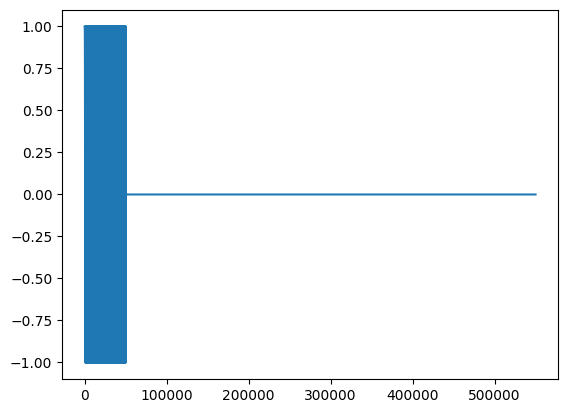

In [7]:
# write to csv for TX

# params
# relative to TX centre freq
sampleRate = 50e6
signalLengthTime = 1e-3
signalLength = signalLengthTime*sampleRate
startFrequency = 0
endFrequency = 2e6


result = []

for i in range(int(signalLength)):
    t = i / sampleRate
    frequency = startFrequency + (endFrequency - startFrequency) * i / signalLength
    phase = 2.0 * np.pi * frequency * t
    sample = 1 * np.exp(1j * phase) + 0j  # 0j denotes a complex number with zero imaginary part
    result.append(sample)

# appending zeros so transmitting is "turned off"
num_zeros = 500000
for i in range(num_zeros):
    result.append(0)
result = np.array(result)

# Write to CSV file
with open('sweep.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for sample in result:
        csvwriter.writerow([sample.real, sample.imag])




plt.plot(result)


/tmp/ipykernel_14718/3552642936.py:37: UserWarning: Input data is complex, switching to return_onesided=False
  frequencies, times, Zxx = stft(complex_data, fs=fs, nperseg=nperseg, noverlap=noverlap)
/tmp/ipykernel_14718/3552642936.py:49: RuntimeWarning: divide by zero encountered in log10
  magnitude_spectrogram_db = 20 * np.log10(magnitude_spectrogram)


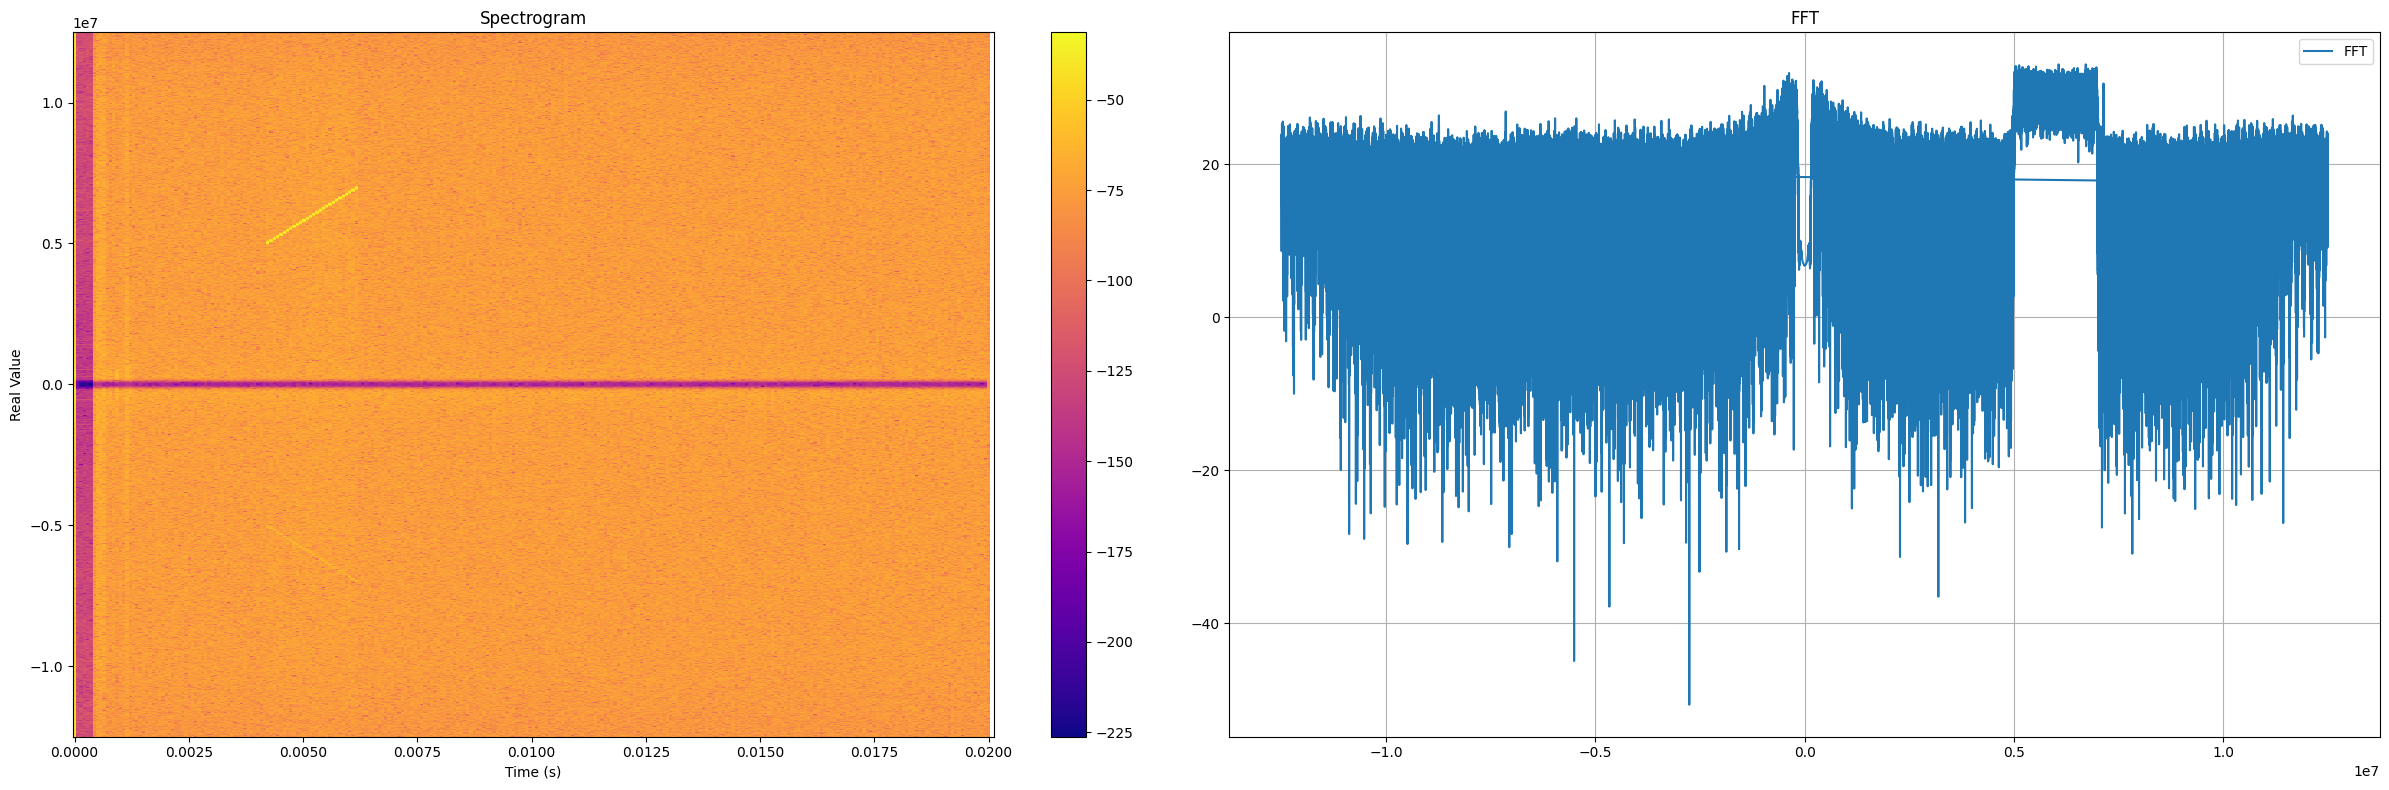

In [11]:
# waterfall

file_path = 'outputs/loopback_from_file_test.bin'
fs = 25e6

# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))

# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]


# Notch filter
# Parameters
notch_freq = 0  # Notch filter centered at 0 Hz (DC)
quality_factor = 30  # Q-factor for the notch filter
cutoff_freq = 0.2e6  # 1 kHz to remove DC component
nyquist_rate = fs / 2
normalized_cutoff = cutoff_freq / nyquist_rate
b, a = butter(4, normalized_cutoff, btype='high', analog=False)
complex_data = filtfilt(b, a, complex_data)




# Compute the Short-Time Fourier Transform (STFT)
nperseg = 256*8  # Number of samples per segment
noverlap = nperseg // 8  # Number of overlapping samples
frequencies, times, Zxx = stft(complex_data, fs=fs, nperseg=nperseg, noverlap=noverlap)


# Shift the zero frequency component to the center
Zxx_shifted = np.fft.fftshift(Zxx, axes=0)
frequencies_shifted = np.fft.fftshift(frequencies)

# Compute the magnitude of the STFT
magnitude_spectrogram = np.abs(Zxx_shifted)
threshold_dB = 40
threshold = 10**(threshold_dB / 20)  # Convert dB to linear scale

magnitude_spectrogram_db = 20 * np.log10(magnitude_spectrogram)



# Plotting spectrogram
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

cax0 = axs[0].pcolormesh(times, frequencies_shifted, magnitude_spectrogram_db, shading='auto', cmap='plasma')
#axs[0].set_colorbar(label='Magnitude (dB)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Real Value')
axs[0].set_title('Spectrogram')

# plotting fft
fft_data = np.fft.fft(complex_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)

# convert to db
magnitude = np.abs(fft_data)
# Filter frequencies below 40 dB 
#threshold_dB = 40
#threshold = 10**(threshold_dB / 20)  # Convert dB to linear scale
#magnitude = np.where(magnitude >= threshold, magnitude, 0.1)
magnitude_db = 20 * np.log10(magnitude)

axs[1].plot(fft_freq_axis, magnitude_db, label='FFT')
axs[1].set_title('FFT')
axs[1].legend()
axs[1].grid(True)

fig.colorbar(cax0, ax=axs[0])
plt.tight_layout()
plt.show()



In [3]:
file_path = 'outputs/loopback_from_file_test.bin'
fs = 25e6

# Read in transmitted csv
df = pd.read_csv('sweep.csv', header=None)
transmitted_signal = df.apply(lambda row: complex(row[0], row[1]), axis=1).to_numpy()

# Read in received bin
with open(file_path, 'rb') as file:
    data = np.fromfile(file, dtype=np.float64)
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
received_signal = data[:, 0] + 1j * data[:, 1]
# Notch filter
# Parameters
notch_freq = 0  # Notch filter centered at 0 Hz (DC)
quality_factor = 30  # Q-factor for the notch filter
cutoff_freq = 0.2e6  # 1 kHz to remove DC component
nyquist_rate = fs / 2
normalized_cutoff = cutoff_freq / nyquist_rate
order = 4
b, a = butter(order, normalized_cutoff, btype='high', analog=False)
received_signal = filtfilt(b, a, received_signal)

# Perform cross-correlation
correlation = np.correlate(received_signal, transmitted_signal, mode='full')

# Find the index of the maximum correlation
time_delay_index = np.argmax(correlation) - len(transmitted_signal) + 1

sampling_rate = 25e6  # Example sampling rate (Hz), adjust as needed
time_between_samples = 1 / sampling_rate
time_delay = time_delay_index * time_between_samples
print(time_delay * c)

#plt.plot(correlation)
#plt.title('Cross-Correlation')
#plt.xlabel('Lag')
#plt.ylabel('Correlation')
#plt.show()

KeyboardInterrupt: 

In [ ]:
# write pulse to csv
# Parameters
T = 50000
n = T//2

ones_array = np.ones(n, dtype=int)
zeros_array = np.zeros(n, dtype=int)


result = np.concatenate((ones_array, zeros_array))/2

# Write to CSV file
with open('square.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for sample in result:
        csvwriter.writerow([sample.real, sample.imag])


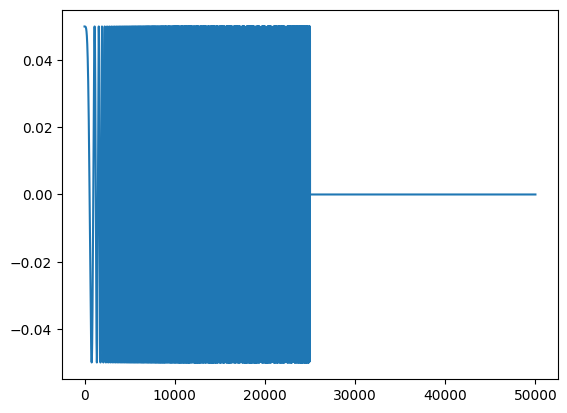

In [20]:
# write sweep pulse to csv
# Parameters
signalLength = 50000
n = signalLength//2
sampleRate = 50e6
startFrequency = 0
endFrequency = 2e6

result = []
for i in range(n):
    t = i / sampleRate
    frequency = startFrequency + (endFrequency - startFrequency) * i / signalLength
    phase = 2.0 * np.pi * frequency * t
    sample = 0.1 * np.exp(1j * phase) + 0j  # 0j denotes a complex number with zero imaginary part
    result.append(sample)

zeros_array = np.zeros(n, dtype=int)

result = np.concatenate((result, zeros_array))/2

# Write to CSV file
with open('sweep_pulse.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for sample in result:
        csvwriter.writerow([sample.real, sample.imag])

plt.plot(result)